In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## our own CART class
import cart

np.random.seed(seed=1)

In [2]:
hitters = pd.read_csv("data/Hitters.csv", usecols=['Years','Hits','Salary'])

In [3]:
hitters = hitters.dropna()

In [4]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hits    263 non-null    int64  
 1   Years   263 non-null    int64  
 2   Salary  263 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 8.2 KB


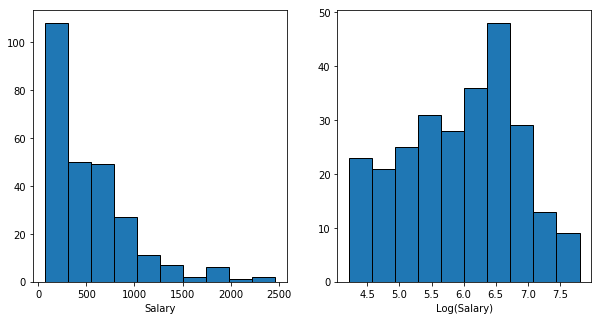

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.hist(hitters.Salary, ec='black')
ax1.set_xlabel('Salary')
ax2.hist(np.log(hitters.Salary), ec='black')
ax2.set_xlabel('Log(Salary)')
plt.show()

In [6]:
hitters['Salary'] = np.log(hitters['Salary']).round(1) ## Transform salary to Salary log
train_data, test_data = train_test_split(hitters, test_size = 0.1, random_state = 42) ## Split dataset

In [7]:
header = list(train_data.columns) ## Get column headers
train_data = train_data.values.tolist() ## Transform df to list of lists
test_data = test_data.values.tolist()

In [20]:
depth = 5
clf = cart.CART(header, depth) ## Depht can also be omitted

In [21]:
clf.find_best_split(train_data)[1] ## Find the best question to ask

Years >= 4.0

In [22]:
my_tree = clf.fit(train_data) ## Fit our CART

In [23]:
clf.print_tree(my_tree) ## Print CART

 Years >= 4.0
 --> True:
   Hits >= 94.0
   --> True:
     Years >= 14.0
     --> True:
       Hits >= 150.0
       --> True:
         Years >= 15.0
         --> True:
           Predict {6.7: '100.0%'}
         --> False:
           Predict {6.9: '100.0%'}
       --> False:
         Years >= 20.0
         --> True:
           Predict {6.2: '100.0%'}
         --> False:
           Predict {7.5: '7.69%', 6.8: '23.08%', 6.3: '15.38%', 6.6: '7.69%', 6.7: '15.38%', 7.3: '15.38%', 6.9: '7.69%', 6.1: '7.69%'}
     --> False:
       Years >= 10.0
       --> True:
         Hits >= 151.0
         --> True:
           Predict {7.8: '25.0%', 7.5: '25.0%', 6.0: '12.5%', 6.6: '12.5%', 6.9: '25.0%'}
         --> False:
           Predict {6.6: '33.33%', 4.6: '8.33%', 6.2: '16.67%', 6.4: '25.0%', 6.5: '8.33%', 7.6: '8.33%'}
       --> False:
         Years >= 6.0
         --> True:
           Predict {6.4: '4.44%', 6.2: '4.44%', 6.7: '11.11%', 4.5: '2.22%', 7.6: '2.22%', 6.8: '11.11%', 6.9: '6.67%', 

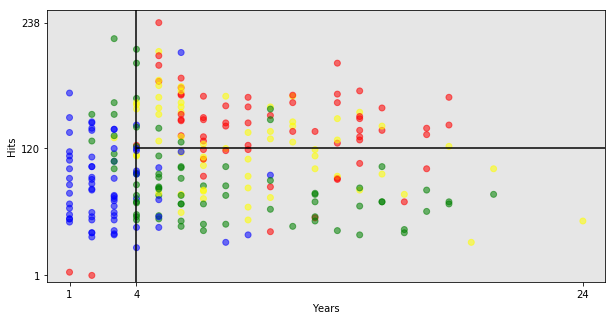

In [24]:
## plot decision boundaries
colors = ["blue","green","yellow","red"]
hitters['Salary_color'] = pd.qcut(hitters['Salary'], labels=colors, q=4)
fig,ax = plt.subplots(figsize=(10,5))
ax.set_facecolor((0.90, 0.90, 0.90))
plt.scatter(hitters.Years, hitters.Hits, c=hitters.Salary_color, alpha=.55)
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4, 24])
plt.yticks([1, 120, 238])
plt.vlines(4, ymin=-5, ymax=250)
plt.hlines(120, xmin=4, xmax=25)
plt.xlabel("Years")
plt.ylabel("Hits")
plt.show()

In [25]:
## Classification with test data
for row in test_data:
    print(f"Actual: {row[-1]}. Predicted: {clf.classify(row, my_tree)}")

Actual: 6.7. Predicted: 4.6
Actual: 5.6. Predicted: 4.6
Actual: 6.8. Predicted: 4.6
Actual: 5.0. Predicted: 6.5
Actual: 5.6. Predicted: 5.6
Actual: 5.6. Predicted: 5.5
Actual: 5.3. Predicted: 6.5
Actual: 4.9. Predicted: 5.1
Actual: 6.2. Predicted: 7.8
Actual: 5.8. Predicted: 6.0
Actual: 6.4. Predicted: 6.5
Actual: 6.7. Predicted: 7.5
Actual: 5.6. Predicted: 5.6
Actual: 5.0. Predicted: 5.1
Actual: 5.7. Predicted: 6.5
Actual: 6.6. Predicted: 4.6
Actual: 7.1. Predicted: 6.5
Actual: 4.6. Predicted: 4.9
Actual: 7.4. Predicted: 6.5
Actual: 6.2. Predicted: 6.5
Actual: 6.6. Predicted: 6.0
Actual: 5.9. Predicted: 5.4
Actual: 6.4. Predicted: 7.2
Actual: 6.3. Predicted: 7.2
Actual: 5.5. Predicted: 6.5
Actual: 4.5. Predicted: 4.6
Actual: 6.6. Predicted: 6.9


In [26]:
## Classification with test data
y_pred = [clf.classify(row, my_tree) for row in train_data]
y_train = [row[-1] for row in train_data]

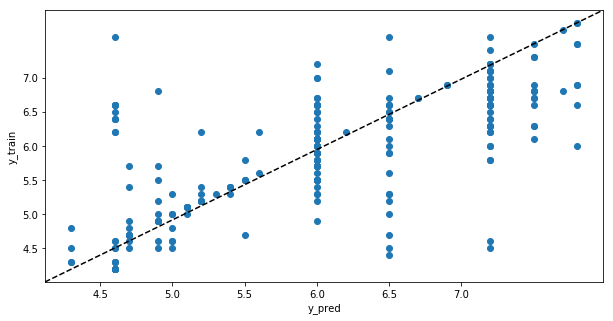

In [27]:
## Plot predictions
fig,ax = plt.subplots(figsize=(10,5))
plt.scatter(y_pred, y_train)
plt.plot([0, 1], [0, 1], '--k', transform = plt.gca().transAxes)
plt.xlabel('y_pred')
plt.ylabel('y_train')
plt.xticks([4.5, 5, 5.5, 6.0, 6.5, 7.0])
plt.yticks([4.5, 5, 5.5, 6.0, 6.5, 7.0])
plt.show()

In [28]:
## Calculate MSE
mean_squared_error(y_train, y_pred)

0.5836864406779663